In [1]:
import numpy as np
import numpy

import matplotlib.pyplot as plt
import h5py
%matplotlib inline


import csiborgtools

%load_ext autoreload
%autoreload 2

In [2]:
paths = csiborgtools.read.Paths(**csiborgtools.paths_glamdring)


In [7]:
d0 = np.load("/mnt/extraspace/rstiskalek/csiborg_postprocessing/field_interpolated/TNG300-1_TNG300-1_density_PCS_00000_1024_scatter0.0.npz")
d1 = np.load("/mnt/extraspace/rstiskalek/csiborg_postprocessing/field_interpolated/TNG300-1_TNG300-1_density_PCS_00000_1024_scatter1.0.npz")
d2 = np.load("/mnt/extraspace/rstiskalek/csiborg_postprocessing/field_interpolated/TNG300-1_TNG300-1_density_PCS_00000_1024_scatter2.0.npz")

val0 = d0["val"]
val1 = d1["val"]
val2 = d2["val"]


with h5py.File("/mnt/extraspace/rstiskalek/TNG300-1/postprocessing/subhalo_catalogue_099.hdf5", 'r') as f:
    mstar = f["SubhaloMassType"][:, 4] * 1e10
    mhi = f["m_neutral_H"][:]
    

SignificanceResult(statistic=-0.1217955937334526, pvalue=0.0)


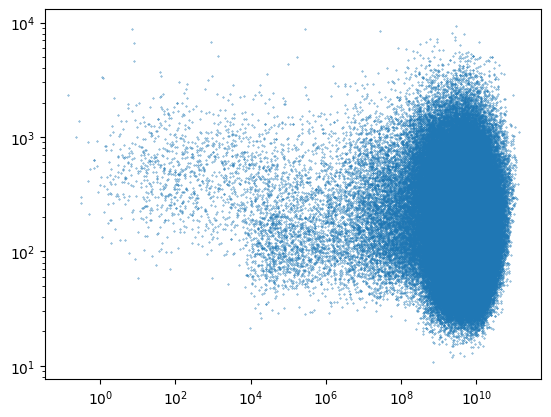

In [28]:
from scipy.stats import spearmanr

k = 1

x = mhi
y = val1[:, k]

m = (x > 0) & (y > 0)
x = x[m]
y = y[m]



plt.figure()
print(spearmanr(x, y))
plt.scatter(x, y, s=0.1)

plt.xscale("log")
plt.yscale("log")
plt.show()

